<p><font size="6"><b>Projet 3 - Openclassrooms. Data Science </b></font></p>


<p><font size="5"><b>Concevez une application de la santé publique </b></font></p>

<p><font size="4"><b>* Nettoyage des données </b></font></p>




Source de données : https://world.openfoodfacts.org/
        
*© 2021, Ilham Noumir  (mailto:ilham.noumir@gmail.com)

## <div class="alert alert-info"> 0. Importation des bibliothèques et chargement des données  : </div> 


####  Importation des bibliothèques : 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import datetime
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
import seaborn as sns 

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline


pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_colwidth', -1)
plt.rcParams.update({'font.size':15})

####  Chargement des données  : 


In [2]:
df= pd.read_csv('en.openfoodfacts.org.products (1).csv',low_memory=False, sep='\t')

In [3]:
data = df.sample(10000)

In [17]:
df.head(2)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/00000000000000225/jeunes-pousses-endives,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,endives,endives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:origins-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-uploaded","en:to-be-completed,en:nutrition-facts-to-be-c

####  Description générale du jeu données : 

In [18]:
df.shape

(1856452, 186)

In [19]:
df.dtypes

code                                          object 
url                                           object 
creator                                       object 
created_t                                     int64  
created_datetime                              object 
last_modified_t                               int64  
last_modified_datetime                        object 
product_name                                  object 
abbreviated_product_name                      object 
generic_name                                  object 
quantity                                      object 
packaging                                     object 
packaging_tags                                object 
packaging_text                                object 
brands                                        object 
brands_tags                                   object 
categories                                    object 
categories_tags                               object 
categories_en               

## <div class="alert alert-info"> 1. Nettoyage du jeu de données  : </div> 

###  <p style="color:green;"><b>1.1 Vérificaion de la qualité des données: nombre et du pourcentage des valeurs manquantes : </p><b>

####  <p style="color:brown;"><b>Fonction qui calcule nombre et du pourcentage des valeurs manquantes : </p><b>

In [20]:
def nombre_percentage_nan(df):
    total_NaN= df.isnull().sum().sum()
    print('Nombre total des NaN:', total_NaN)
    percentage_NaN= round(total_NaN*100/((df.shape[0]*df.shape[1])),2)
    print('Percentage total des NaN:', percentage_NaN)


In [21]:
nombre_percentage_nan(df)

Nombre total des NaN: 275140549
Percentage total des NaN: 79.68



#### Valeur manquante par colone: 

In [22]:
df.isnull().sum()

code                                          0      
url                                           0      
creator                                       4      
created_t                                     0      
created_datetime                              0      
last_modified_t                               0      
last_modified_datetime                        0      
product_name                                  79184  
abbreviated_product_name                      1849847
generic_name                                  1738216
quantity                                      1386958
packaging                                     1562686
packaging_tags                                1562719
packaging_text                                1851367
brands                                        895379 
brands_tags                                   895439 
categories                                    976012 
categories_tags                               976014 
categories_en               

In [23]:
data_missing= pd.DataFrame((((df.isnull().sum()/len(df))*100 ).sort_values(ascending=False)))
data_missing= data_missing.reset_index()
data_missing.rename(columns = {0:'% of Total Values'} , inplace= True)
data_missing

,index,% of Total Values
0,no_nutriments,100.000000
1,cities,100.000000
2,allergens_en,100.000000
3,ingredients_from_palm_oil,100.000000
4,ingredients_that_may_be_from_palm_oil,100.000000
5,water-hardness_100g,99.999946
6,-elaidic-acid_100g,99.999892
7,glycemic-index_100g,99.999785
8,additives,99.999785
9,-caproic-acid_100g,99.999731


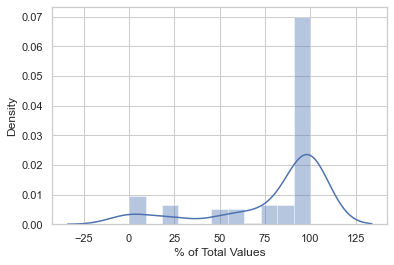

In [24]:
sns.set(style="whitegrid")
sns.distplot(data_missing['% of Total Values'])
plt.show()

* Le jeu de données contient beaucoup de valeurs manquantes : 80% .
* des colones vides : (100 % de valeurs manquantes).
* La distribution des valeurs manquantes montre une répartion des NAN dans l'intervalle 50% et 100 % .
* La figure suivante montre le pourcentage des NAN par colones  :

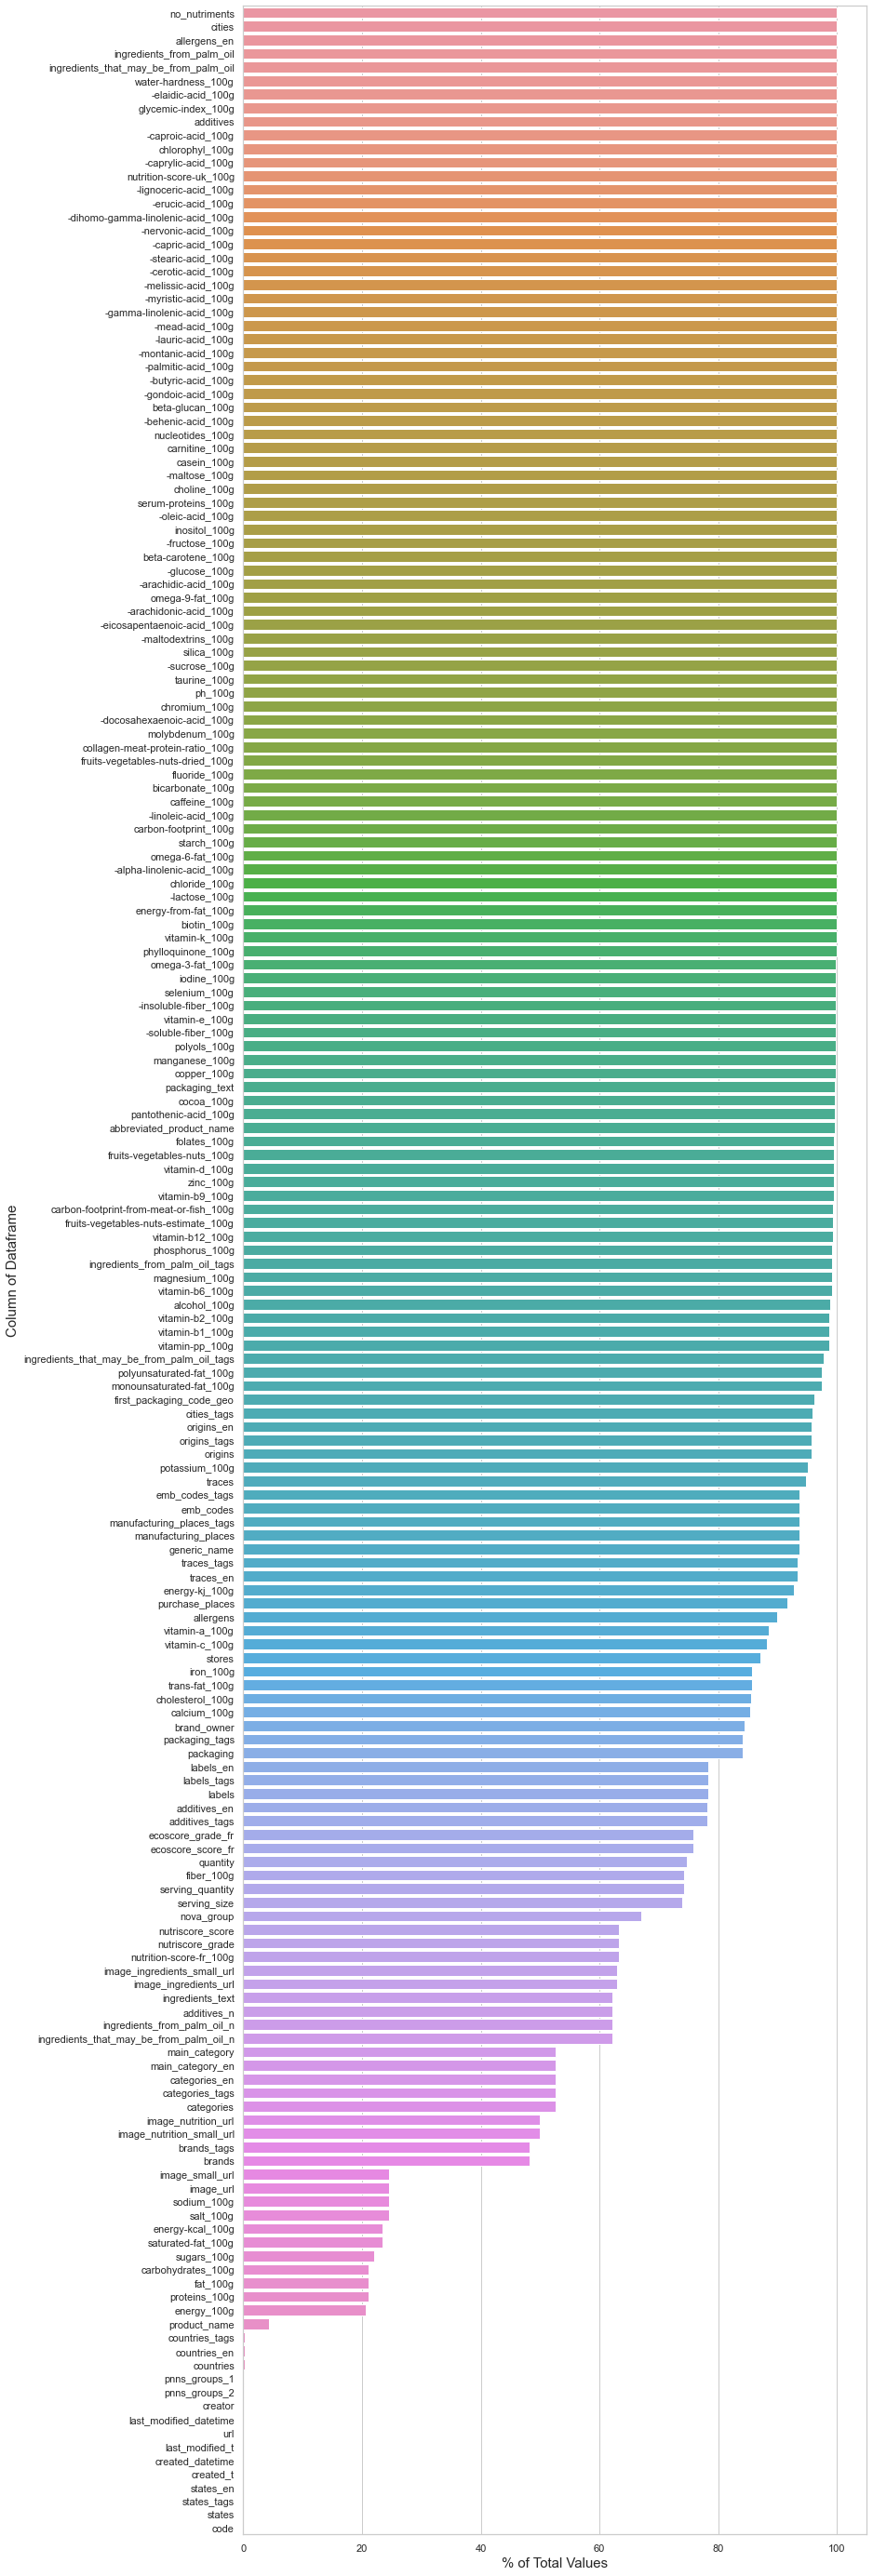

In [25]:
plt.figure(figsize=(12,50))
sns.barplot(x='% of Total Values',y='index', data=data_missing)
plt.xlabel('% of Total Values', fontsize=15)
plt.ylabel('Column of Dataframe', fontsize=15)
plt.show()

###  <p style="color:green;"><b>1.2 traitement des colones ayant un pourcentage élevé des NAN :  </p><b>

####  <p style="color:brown;"><b>Fonction qui supprime les colones ayant un faible taux de remplissage : </p><b>

In [26]:
def delete_nan(data, taux_nan_admis): 
    missing= pd.DataFrame((((data.isnull().sum()/len(data))*100 ).sort_values(ascending=False))).reset_index()
    missing.rename(columns = {0:'% of Total Values'} , inplace= True)
    missing= missing.loc[missing['% of Total Values']> taux_nan_admis]
    missing= missing.reset_index().rename(columns= {'index':'name_of_colone'})
    for row in missing.itertuples():
        name= row.name_of_colone
        data.drop([name], axis='columns', inplace=True)
    return data

In [27]:
df= delete_nan(df ,65)

In [28]:
df.shape

(1856452, 45)

* La fonction delete_nan supprime les colones qui ont un taux de NAN supérieur à 65 % .
* La figure suivante montre la répartition des NAN aprés l'application de la fonction delete_nan : 

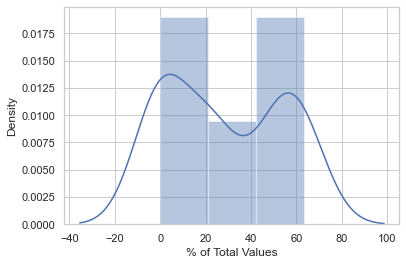

In [29]:
sns.set(style="whitegrid")
data_missing= pd.DataFrame((((df.isnull().sum()/len(df))*100 ).sort_values(ascending=False))).reset_index()
data_missing.rename(columns = {0:'% of Total Values'} , inplace= True)
sns.distplot(data_missing['% of Total Values'])
plt.show()

###  <p style="color:green;"><b>1.3 traitement des colones non pertinents à l'étude  :  </p><b>

####  <p style="color:brown;"><b>Fonction qui supprime les colones non petinents à l'étude : </p><b>

In [30]:
def delete_non_relevant_column(data):
    searchfor= ['url','Unnamed','states','image']
    for i in data.loc[:, data.columns.str.contains('|'.join(searchfor))].columns:
        data.drop(columns=i, inplace=True)
    return data 

##### Dans le présent jeu de données : Il y a des colones qui ne sont pas d'une grande utilité pour l'analyse et l'interprétation des données  : 
* les colones qui contiennet des images ;
* les colons qui contiennt les sites web(url)
* les colones qui contiennet des state 

In [31]:
df = delete_non_relevant_column(df)

In [32]:

def nombre_percentage_nan(df):
    total_NaN= df.isnull().sum().sum()
    print('Nombre total des NaN:', total_NaN)
    percentage_NaN= round(total_NaN*100/((df.shape[0]*df.shape[1])),2)
    print('Percentage total des NaN:', percentage_NaN)


In [33]:
df.shape

(1856452, 35)

###  <p style="color:green;"><b>1.4 traitement des colones dates :  </p><b>

In [34]:
data_types= pd.DataFrame(df.dtypes).reset_index()
data_missing_types= data_missing.merge(data_types, on='index', how='inner')
data_missing_types

,index,% of Total Values,0
0,nutriscore_score,63.203035,float64
1,nutriscore_grade,63.203035,object
2,nutrition-score-fr_100g,63.202819,float64
3,ingredients_text,62.175322,object
4,additives_n,62.175268,float64
5,ingredients_from_palm_oil_n,62.175268,float64
6,ingredients_that_may_be_from_palm_oil_n,62.175268,float64
7,categories_tags,52.574158,object
8,categories_en,52.574158,object
9,main_category_en,52.574158,object


####  <p style="color:brown;"><b>Fonction qui convertit les colones dates (Objet-> Datetime ) : </p><b>

##### Dans le jeu de données il y a quarte colones qui font référence à la date mais ils ont pour type objet: 
* les colones qui se treminet avec "_t" sont des dates au format timestamp  (nbr de secondes depuis le 1er janvier 1970).
* Les qui se terminent avec "_datetime" sont des dates au format iso8601 : yyyy-mm-ddThh:mn:ssZ

In [35]:
def convet_datetime(data): 
    for col in data.columns: 
        if col.endswith('_t'): 
            data[col]= pd.to_datetime(data[col], unit='s')
        elif col.endswith('_datetime'):
            data[col]= pd.to_datetime(data[col], infer_datetime_format=True, format = "%Y-%m-%dT%h:%M:%s").dt.tz_localize(None)
    return data


In [36]:
df = convet_datetime(df)

###  <p style="color:green;"><b>1.5 Correction des types de données:  :  </p><b>

####  <p style="color:brown;"><b>Fonction qui corrige le type de données des colones catégories(Objet-> category) : </p><b>

In [37]:
df.ingredients_from_palm_oil_n.unique()

array([nan,  0.,  1.,  3.,  2.])

In [38]:
df.ingredients_that_may_be_from_palm_oil_n.nunique()

7

In [39]:
def convert_to_category(df): 
    categories_columns= ['ingredients_that_may_be_from_palm_oil_n','ingredients_from_palm_oil_n']
    for column in categories_columns:
        df[column]= df[column].astype('category')
    return df 
    

In [40]:
df =convert_to_category(df)

###  <p style="color:green;"><b>1.6 filtrage de la zone d'étdues:  :  </p><b>



####  <p style="color:brown;"><b>Fonction qui tri les données selon les pays (pays d'étude : France ) : </p><b>

In [41]:
df.countries.unique()

array(['en:france', 'France', 'Espagne', ..., 'Republik Kongo',
       'Spain,Argentina - Español,Armenia - Pyсский,Aruba - Español,Asia Pacific,Australia - English,Austria - Deutsch,Azerbaijan - Русский,Belarus - Pyсский,Belgium - Français,Belgium - Nederlands,Bolivia - Español,Bosnia i Hercegovina - Bosnian,Botswana - English,Brazil - Português,Bulgaria - български,Cambodia - English,Cambodia - ភាសាខ្មែរ,Canada - English,Canada - Français,Chile - Español,China - 中文,Colombia - Español,Costa Rica - Español,Croatia - Hrvatski,Cyprus - Ελληνικά,Czech Republic - Čeština,Denmark - Dansk,Ecuador - Español,El Salvador - Español,Estonia - Eesti,Europe,Finland - Suomi,France - Français,Georgia - ქართული,Germany - Deutsch,Ghana - English,Greece - Ελληνικά,Guatemala - Español,Honduras - Español,Hong Kong - 粵語,Hungary - Magyar,Iceland - Íslenska,India - English,Indonesia - Bahasa Indonesia,Ireland - English,Israel - עברית,Italy - Italiano,Jamaica - English,Japan - 日本語,Kazakhstan - Pyсский,Korea -

In [42]:
def choix_pays(dataframe):
    liste_pays = ['France', 'FR', 'en:FR', 'en:fr', 'en:France', 'Frankreich', 
              'france', 'Réunion', 'Francia', 'French Polynesia', 'Frankrijk', 
              'Nouvelle-Calédonie', 'Martinique', 'Guadeloupe', 
              'Polynésie Française', 'Mayotte'] 
    return dataframe[dataframe['countries'].isin(liste_pays)]


In [43]:
df =choix_pays(df)

###  <p style="color:green;"><b>1.7 Traitement des colonnes contenant des informations redondantes :    </p><b>

####  <p style="color:brown;"><b>Fonction qui supprime les colonnes ayant des informations redondantes : </p><b>

##### Après examen des colones de la dataframe : plusieurs colones contiennet  presque les mêmes informations: 

In [32]:
df['Diff']= np.where(df['last_modified_datetime']==df['last_modified_t'] , 1 ,0)
sum(df['Diff']) == len(df)

True

In [44]:
def remove_columns(df):
    colone_a_supprimer = ['last_modified_datetime', 'created_datetime' ,'categories_tags','categories_en'
                      ,'brands_tags','countries_tags' ,'countries_en','origins_tags','traces_tags' ,
                      'traces_en', 'main_category_en']
    for col in colone_a_supprimer : 
        if col in df.columns : 
            df.drop(columns=[col],axis='columns', inplace=True)
    return df 


In [45]:
df = remove_columns(df)

###  <p style="color:green;"><b>1.8 Traitement des valeurs négatives :    </p><b>

In [46]:
df.select_dtypes(['int64','float64']).describe()

,additives_n,nutriscore_score,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,205486.000000,236937.000000,5.043550e+05,5.276660e+05,523912.000000,527379.000000,523772.000000,526466.000000,525538.000000,511018.000000,511017.000000,236940.000000
mean,1.597082,9.453184,2.799547e+02,1.170565e+03,14.235537,5.425011,26.914975,13.610135,9.154988,1.275964,0.510508,9.453305
std,2.377895,8.758978,1.924760e+03,1.115756e+04,43.651358,8.388901,266.687252,42.226931,101.180241,20.303175,8.121605,8.759001
min,0.000000,-15.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,-15.000000
25%,0.000000,2.000000,1.140000e+02,4.730000e+02,1.000000,0.200000,2.300000,0.600000,1.500000,0.060000,0.024000,2.000000
50%,1.000000,10.000000,2.630000e+02,1.088000e+03,8.000000,2.000000,13.300000,3.300000,6.300000,0.550000,0.220000,10.000000
75%,2.000000,16.000000,4.000000e+02,1.669000e+03,22.000000,8.000000,51.000000,19.000000,13.000000,1.300000,0.520000,16.000000
max,30.000000,40.000000,1.360000e+06,8.010000e+06,29000.000000,2000.000000,192000.000000,27000.000000,73000.000000,14000.000000,5600.000000,40.000000


####  <p style="color:brown;"><b>Fonction qui remplace les valeurs négatives par np.nan : </p><b>

In [35]:
def negative_values(df) : 
    for column in df.select_dtypes(include = ['int32','float64']).columns :
        df.loc[df[column] < 0] = np.nan
    return df 


def negative_values_2(df) : 
    for column in df.select_dtypes(['int64', 'float64']).columns: 
        df[column]= df[column].apply(lambda x : x if x>0 else np.nan)
    return df 
    

In [36]:
df= negative_values(df)

###  <p style="color:green;"><b>1.9 Traitement des colones _100g  :    </p><b>

In [38]:
def column_100g(df) : 
    col_100g = [c for c in df.columns if c.endswith('_100g') and c!='energy_100g' 
                and c!='energy-kj_100g' and c!='energy-kcal_100g'
                and c!='nutrition-score-fr_100g']
    for i in range(len(col_100g)):
        colonne = col_100g[i]
        mask = df[colonne] > 100.0
        df = df.drop(df[mask].index)
    return df

In [39]:
df= column_100g(df)

###  <p style="color:green;"><b>1.10 Traitement des outliers  :    </p><b>

In [40]:
data= df.copy()

def treat_outliers_std(df) : 
   
    numeric_columns= df.select_dtypes(['float64', 'int64'])
    no_numeric_columns = df.select_dtypes(exclude=['float64', 'int64'])
    data_mean, data_std = np.mean(numeric_columns), np.std(numeric_columns)
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    idx = ~((numeric_columns < lower) | (numeric_columns > upper)).any(axis=1)
    df_final =  pd.concat([numeric_columns.loc[idx], no_numeric_columns.loc[idx]], axis=1)
    return df_final

def treat_outliers_quantille(data) : 
    numeric_columns= data.select_dtypes(['float64', 'int64'])
    no_numeric_columns = data.select_dtypes(exclude=['float64', 'int64'])
    for col in numeric_columns.columns: 
        data.drop(data.loc[data[col] > 100].index, inplace=True)
        Q1=data[col].quantile(0.25)
        Q3=data[col].quantile(0.75)
        IQR=Q3 -Q1
        data[col].mask(((data[col]< (Q1- 1.5*IQR)) | (data[col]  >(Q3+ 1.5*IQR))), np.nan)
    return data

In [41]:
df= treat_outliers_std(df)
data= treat_outliers_quantille(data)


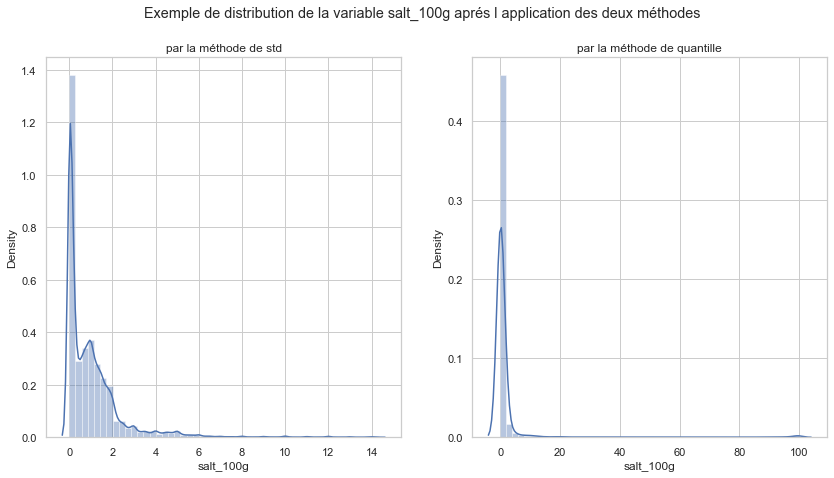

In [42]:
fig, axes= plt.subplots(1,2, figsize= (14,7))

fig.suptitle('Exemple de distribution de la variable salt_100g aprés l application des deux méthodes ')
ax1 = sns.distplot(df['salt_100g'].dropna() , ax= axes[0])
ax1.set_title('par la méthode de std')
ax2 = sns.distplot(data['salt_100g'].dropna() , ax= axes[1])
ax2.set_title('par la méthode de quantille')
plt.show()

###  <p style="color:green;"><b>1.11 Traitement des valeurs manquantes  :    </p><b>

Pour l'imputation des valeurs manquantes. J'ai essayé plusieurs méthodes comme sorte d'excercices :
* SimpleImputer : qui remplace toute valeur manquante par une statistique ou une constante donnée
* KNNImputer : un algorithme qui remplace les valeurs manquantes d'un échantillon par les valeurs de ses plus proches voisin.J'ai essayé cet alogorithme  pour l'ensemble des données mais ca appris enormement de temps sans que cela ne marche car c'est un algorthime qui consomme  beaucoup de ressources (pour un point donné il doit chercher tous les voisins les plus proches) donc j'ai finis par l'appliquer sur un échantillon de 5000.
* IterativeImputer : Cette forme d'imputation utilise les méthodes de la régression linéarire multiple pour imputer les valeurs. Dans l'imputation par régression une colone avec des valeurs manquantes est considérée comme la sortie y et les autres colones comme les entrées Xi.
* Interpolate : Cette méthode est utilisé pour des variables continues. L'interpolation consiste à compléter une valeur par la valeur précédante la valeur suivante ou les deux en même temps. Une approche posssible pour les méthodes consiste à remplacer la valeur manquante par la moyenne de la valeur suivante et la valeur précédante. L'inconvenient est que vous pouvez interpoler uniquement les variables bien réparties.  


In [43]:
def impute_NaN_iterative(df): 
    numeric_columns= df.select_dtypes(['int64','float64'])
    colone= numeric_columns.columns
    no_numeric_columns= df.select_dtypes(exclude=['int64','float64'])
    no_numeric_columns.reset_index(drop=True,inplace=True)
    imputer = IterativeImputer()
    X= numeric_columns.values
    imputer.fit(X)
    X_trans= imputer.transform(X)
    numeric_columns= pd.DataFrame(X_trans , columns=colone)
    numeric_columns.reset_index(drop=True,inplace=True)
    df_final = pd.concat([numeric_columns, no_numeric_columns], axis= 1)
    df= df_final
    return df



def impute_Knn(df):
    df_sample = df.sampe(5000)
    X= df_sample.select_dtypes(['float64', 'int64'])
    for col in X.columns: 
        df_sample.drop(columns=[col], inplace=True)
    imputer = KNNImputer(n_neighbors=3)
    imputed = imputer.fit_transform(X)
    df_imputed = pd.DataFrame(imputed, columns=X.columns)
    df_final= pd.concat([df_sample,df_imputed],axis=1)
    return df_final


def Impute_NaN_interpolate(df) :
    for col in df.select_dtypes(['int64','float64']):
        df[col].interpolate(method='linear', inplace=True)
    return df


def Simple_Imputer(df): 
    numeric_columns= df.select_dtypes(['int64', 'float64'])
    Impute = SimpleImputer(missing_values=np.nan, strategy='mean')
    for col in numeric_columns: 
        Imput = Impute.fit(df[[col]])
        df[[col]]= Impute.transform(df[[col]])
    return df

In [44]:
df= Impute_NaN_interpolate(df)

## <div class="alert alert-info"> 2. Automatisation du processus de nettoyage : </div> 

Pour l'automatisation du processus de nettoyage. Un fichier.py  a été crée dans le même dossier (functions.py) contenant toutes les fonctions de nettoyage. et la fonction ci-dessous total_clean() qui appel ces fonctions avec la gestion d'exception (try except)

In [4]:
from functions import * 

In [5]:

def total_clean(df): 
    print('Le nettoyage Globale de la dataframe .....')
    print('-'*60)
    print(nombre_percentage_nan(df))
    print('La dimension de la dataframe : ' , df.shape)

    print('-'*60) 
    
    print('-'*60)
    print('Nettoyage des colones avec plus de 65 % des NaN')
    try : 
        df= delete_nan(df, 65)
    except Exception as e :
        print(e)
        print('Réduction des colones de la dataframe est échoué ')
    
    print('-'*60)
    print('Mise en conformité du format de la date')
    try : 
        df = convet_datetime(df)
    except Exception as e:
        print(e)
        print('Erreur dans la mise en conformité des dates')
    
        
    print('-'*60)
    print('Suppression des colones non pertinents')
    try : 
        df = delete_non_relevant_column(df)
    except Exception as e  :
        print(e)
        print('Suppression des colones non pertinents a échoué')
        
    print('-'*60)
    print('Conversion des colones objet en category')
    try : 
        df= convert_to_category(df)
    except Exception as e :
        print(e)
        print("La conversion au type 'category' a échoué")
        
    print('-'*60)
    print('Réduction de la dataset ')
    try : 
        df= choix_pays(df)
    except Exception as e : 
        print(e)
        print('La réduction de la dataframe  a échoué')
        
        
    print('-'*60)
    print('Suppression des colones redondants:')
    try : 
        df = remove_columns(df)
    except Exception as e : 
        print(e)
        print("La suppression des colones redondants a échoué")
    
    print('-'*60)
    print('Traitement des valeurs négatives')
    try : 
        df = negative_values(df)
    except Exception as e :
        print(e)
        print('Le traitement des valeurs négatifs a échoué ') 
        
        
    print('-'*60)
    print('Traitement des colones 100_g')
    try : 
        df = column_100g(df)
    except Exception as e :
        print(e)
        print('Le traitement des colones 100_g a échoué') 
        
        
        
    print('-'*60)
    print('Traitement des outliers')
    try : 
        df = treat_outliers_std(df)
    except Exception as e :
        print(e)
        print('Le traitement des outliers a échoué ')
         
        
    print('-'*60)
    print('Imputation des NaN')
    try : 
        df= impute_NaN_iterative(df)
    except  Exception as e:
        print(e)
        print("L'imputation des NaN a échoué")
    
    print('-'*60)
    print('-'*60)
    print('le pourcentage actuel des NaN dans la dataframe' , nombre_percentage_nan(df))
    print('La dimension de la dataframe : ' , df.shape)   
    return df 

In [6]:
%%time
df = total_clean(df)

Le nettoyage Globale de la dataframe .....
------------------------------------------------------------
Nombre total des NaN: 275140549
Percentage total des NaN: 79.68
None
La dimension de la dataframe :  (1856452, 186)
------------------------------------------------------------
------------------------------------------------------------
Nettoyage des colones avec plus de 65 % des NaN
------------------------------------------------------------
Mise en conformité du format de la date
------------------------------------------------------------
Suppression des colones non pertinents
------------------------------------------------------------
Conversion des colones objet en category
------------------------------------------------------------
Réduction de la dataset 
------------------------------------------------------------
Suppression des colones redondants:
------------------------------------------------------------
Traitement des valeurs négatives
------------------------------

## <div class="alert alert-info"> 3. Sauvegarde de la dataframe en fichier CSV  : </div> 

In [219]:
df.to_csv('data_clean_principal.csv' , index=False)
res = df.dtypes.to_frame('dtypes').reset_index()
types = res.to_csv('dtypes.csv', index=False)